# Stock Analyzer

In [279]:
import datetime as dt
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..', 'src')))

import analysis
import model_arma_arch
import model_pytorch

import warnings
warnings.simplefilter("ignore", category = FutureWarning)

## ARCH fits

### Boeing 2020

Boeing (BA) stock was heavily affected by the COVID market crash in early 2020, due to the sharp decrease in the number of passengers. By considering the log returns of this stock in the lead-up to the crash and its immediate aftermath, we see no noticeable autocorrelation in the returns themselves, but strong autocorrelation in the residuals (or, equivalently, in the squared returns). This suggests that a GARCH(1,1) model is appropriate for this data.

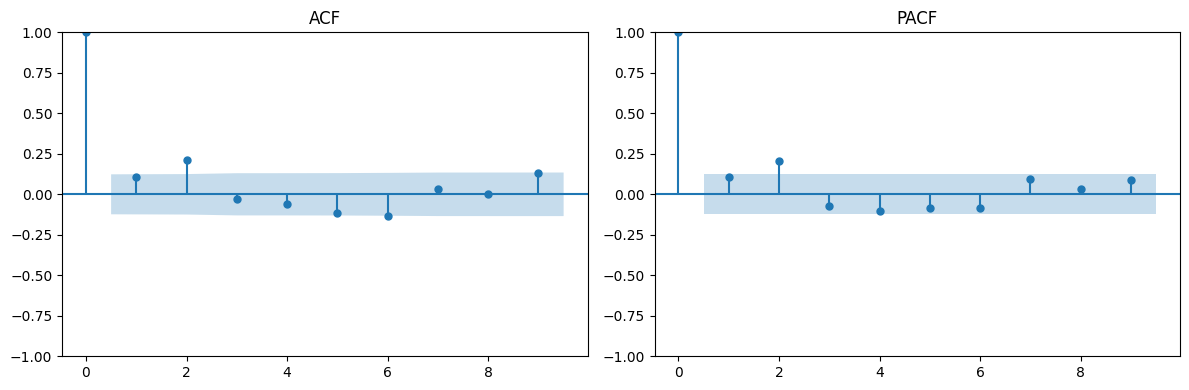

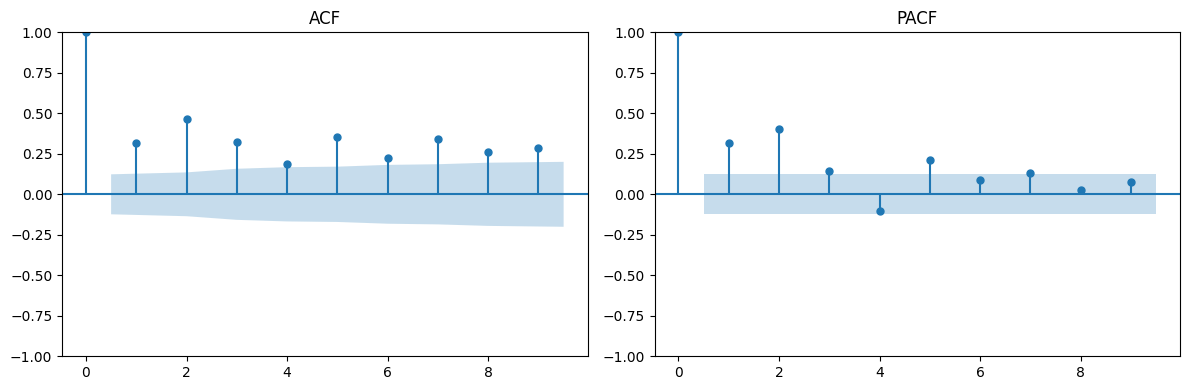

In [280]:
start = dt.datetime(2019, 10, 1)
end = dt.datetime(2020, 10, 1)
stock = analysis.retrieve_stock('BA', start, end)
log_returns = analysis.log_returns(stock)

analysis.plot_acf_pacf(log_returns, lags = 9)
analysis.plot_acf_pacf(log_returns ** 2, lags = 9)

The GARCH model is incapable of predicting the crash itself, but when the initial stages of the crash are included in the fit, it can produce reliable predictions for the volatility decline following the crash.

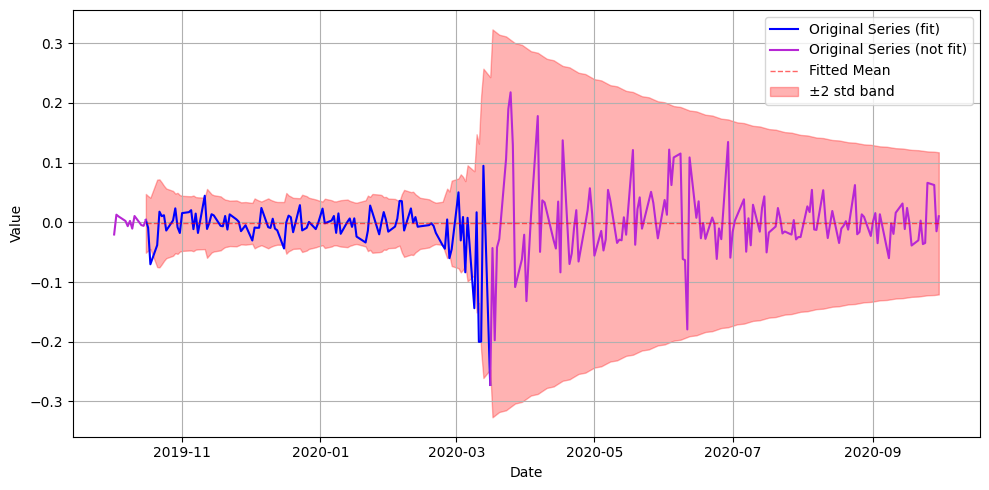

In [281]:
arch = model_arma_arch.fit_ARCH(log_returns[10:114], lags = 0, p = 1, q = 1)
analysis.plot_series(log_returns, arch, horizon = 142)

### Gamestop 2021

Similarly to the Boeing case considered above, the ACF/PACF plots indicate that the GARCH(1,1) fit is appropriate.

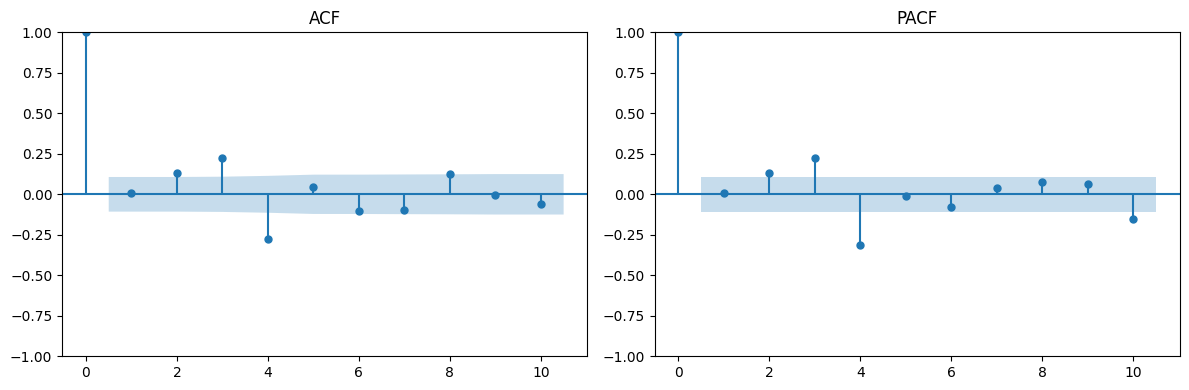

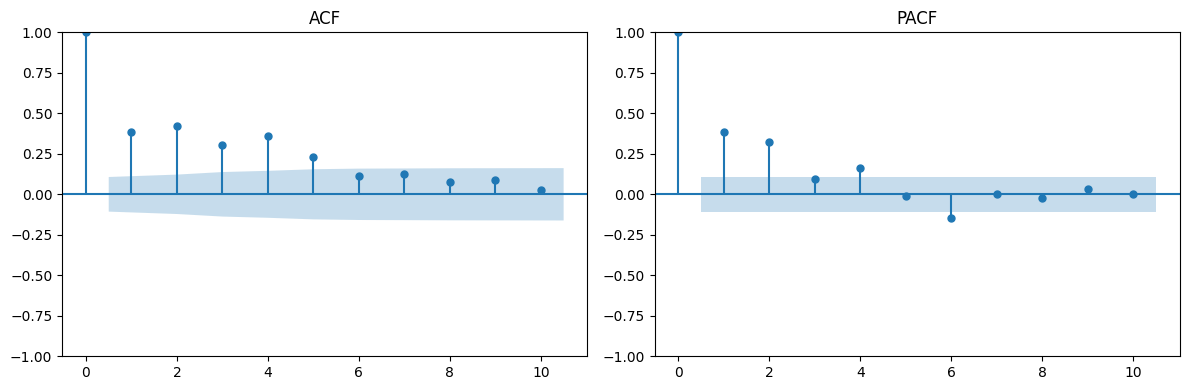

In [282]:
start = dt.datetime(2020, 7, 1)
end = dt.datetime(2021, 11, 1)
stock = analysis.retrieve_stock('GME', start, end)
log_returns = analysis.log_returns(stock)

analysis.plot_acf_pacf(log_returns, lags = 10)
analysis.plot_acf_pacf(log_returns ** 2, lags = 10)

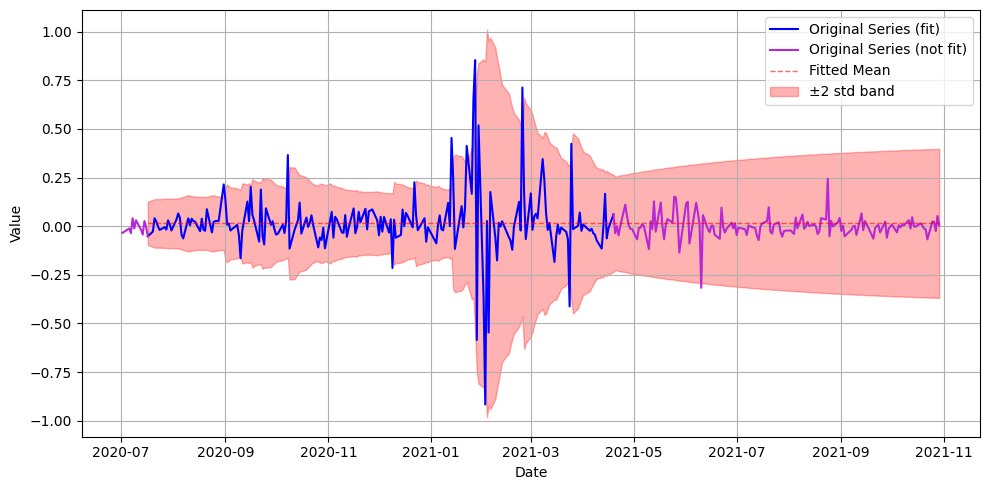

In [283]:
arch = model_arma_arch.fit_ARCH(log_returns[10:200], lags = 0, p = 1, q = 1)
analysis.plot_series(log_returns, arch, horizon = 139)

The GARCH model performs well in capturing the duration of the post-squeeze volatility suppression, as well as the magnitude of the subsequent volatility resurgence. Beyond that, however, the widening of the forecast cone suggests possible non-stationarity associated with the short squeeze, making long-term volatility forecasts from the GARCH model unreliable.

### Apple 2020

In both examples considered above, only the residuals of the stock returns exhibited autocorrelation. This is not always the case, as illustrated by the behavior of Apple (AAPL) stock during 2020. As shown in the ACF/PACF plots below, both the residuals and the log returns themselves display significant autocorrelation. This suggests the need for a more general modeling approach: instead of a standard GARCH(1,1) model — which captures volatility clustering via residuals alone — an augmented model with an additional AR(1) term is appropriate.

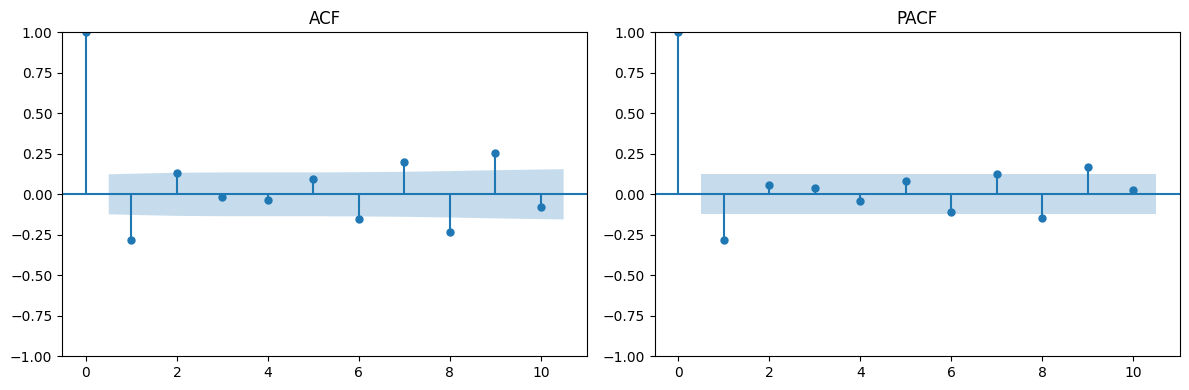

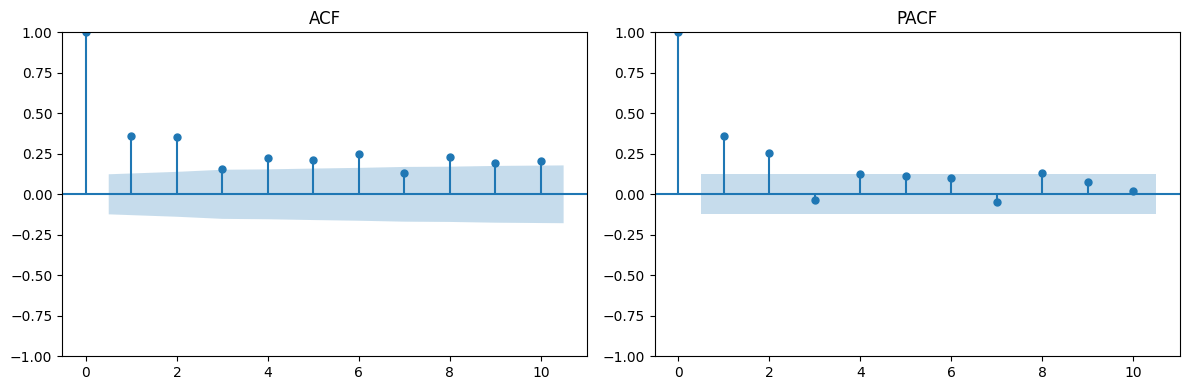

In [284]:
start = dt.datetime(2019, 11, 1)
end = dt.datetime(2020, 11, 1)
stock = analysis.retrieve_stock('AAPL', start, end)
log_returns = analysis.log_returns(stock)

analysis.plot_acf_pacf(log_returns, lags = 10)
analysis.plot_acf_pacf(log_returns ** 2, lags = 10)

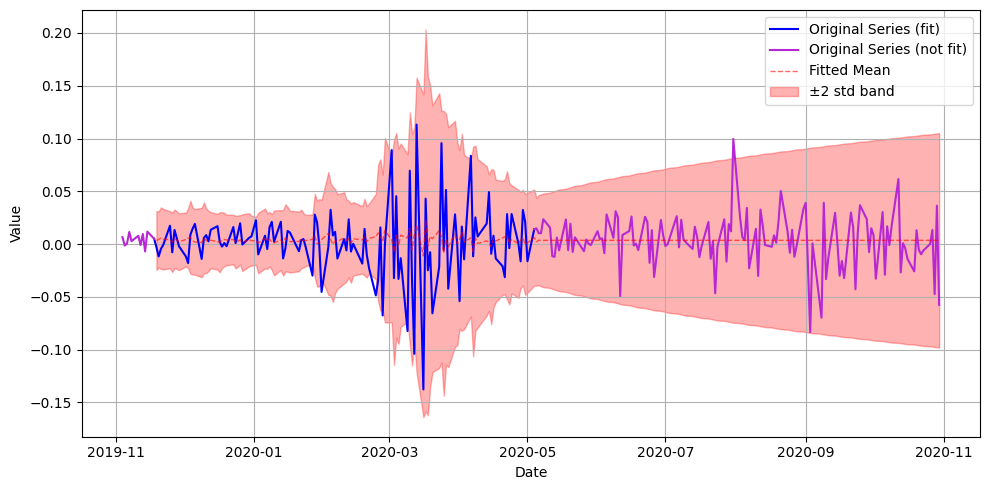

In [285]:
arch = model_arma_arch.fit_ARCH(log_returns[10:125], lags = 1, p = 1, q = 1)
analysis.plot_series(log_returns, arch, horizon = 129)

Excluding the AR(1) term results in a noticeably narrower forecast cone, which aligns poorly with the observed data.

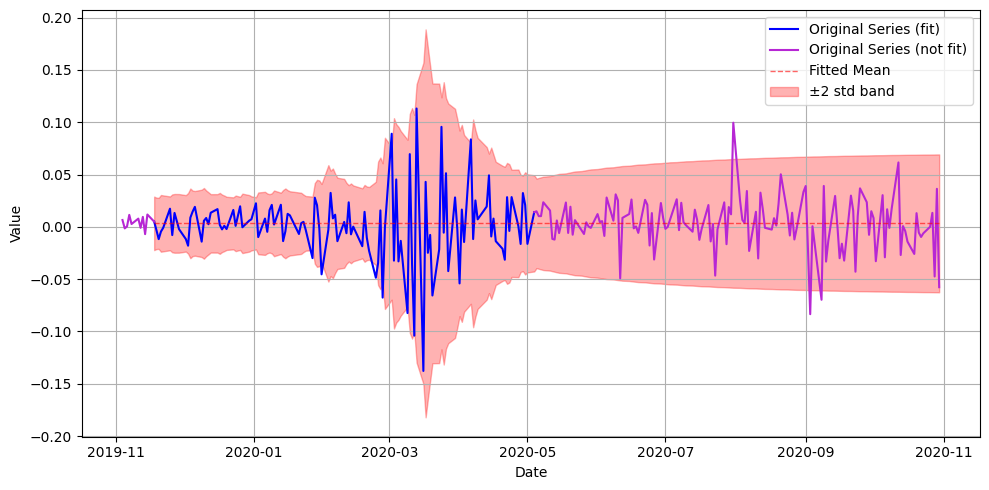

In [286]:
arch_no_ar = model_arma_arch.fit_ARCH(log_returns[10:125], lags = 0, p = 1, q = 1)
analysis.plot_series(log_returns, arch_no_ar, horizon = 129)